In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [2]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(
    -tf.reduce_sum(y_ * tf.log(y), reduction_indices =[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(\
        cross_entropy)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


0.9193
Label: [5]
Prediction: [5]


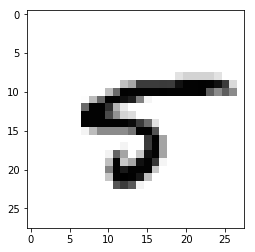

In [3]:
for i in range(1000) :
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict ={x: batch_xs, y_: batch_ys})
    
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x : mnist.test.images,
                                   y_: mnist.test.labels}))

import matplotlib.pyplot as plt
import random

r = random.randint(0, mnist.test.num_examples -1)
print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print("Prediction:", sess.run(tf.argmax(y, 1),
                             feed_dict={x: mnist.test.images[r:r +1]}))

plt.imshow(mnist.test.images[r:r+1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()